## 2.1.1. Ôn tập lý thuyết

## 2.1.2. Bài làm mẫu

Bài toán 1: Xây dựng cây quyết định và rừng cây với dữ liệu lấy từ
https://www.kaggle.com/datasets/deceneu/default-of-credit-card-clients

Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

1. Tải một số package mà chúng tôi sử dụng và package graphviz, để vẽ cây quyết định

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

2. Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải
quyết

In [2]:
df = pd.read_csv('data/default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

3. Chuẩn bị dữ liệu cho tập train và tập test

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [4]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

5. Hiển thị cây quyết định với package graphviz

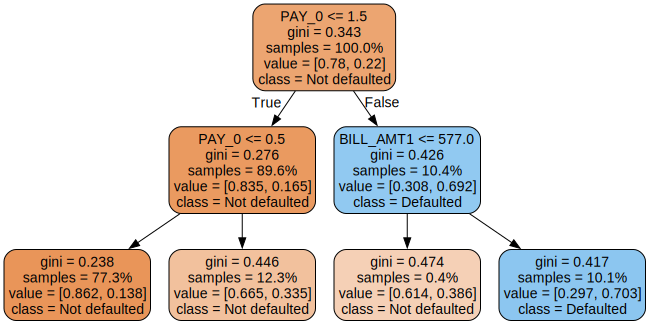

In [5]:
dot_data = tree.export_graphviz(dt,
                out_file=None,
                filled=True,
                rounded=True,
                feature_names=\
                features_response[:-1],
                proportion=True,
                class_names=['Not defaulted', 'Defaulted'])
graph = graphviz.Source(dot_data)
graph

Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô
hình với các tham số khác nhau
1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu
2. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu

In [6]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True) # cv is the best model.
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

scoring='roc_auc': Đây là thước đo (metric) được dùng để đánh giá hiệu quả của mô hình phân loại nhị phân (binary classification)

CV là dữ liệu của bạn được chia thành 4 phần bằng nhau:

    - Mỗi lần, 3 phần dùng để train, và 1 phần còn lại dùng để test
    
    - Lặp lại 4 lần để đảm bảo mỗi phần đều được test 1 lần
    
    - Cuối cùng, lấy trung bình của 4 lần test → kết quả chính xác hơn, giảm phụ thuộc vào cách chia dữ liệu ngẫu nhiên

return_train_score=True: trả thêm cả điểm trên tập train

3. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

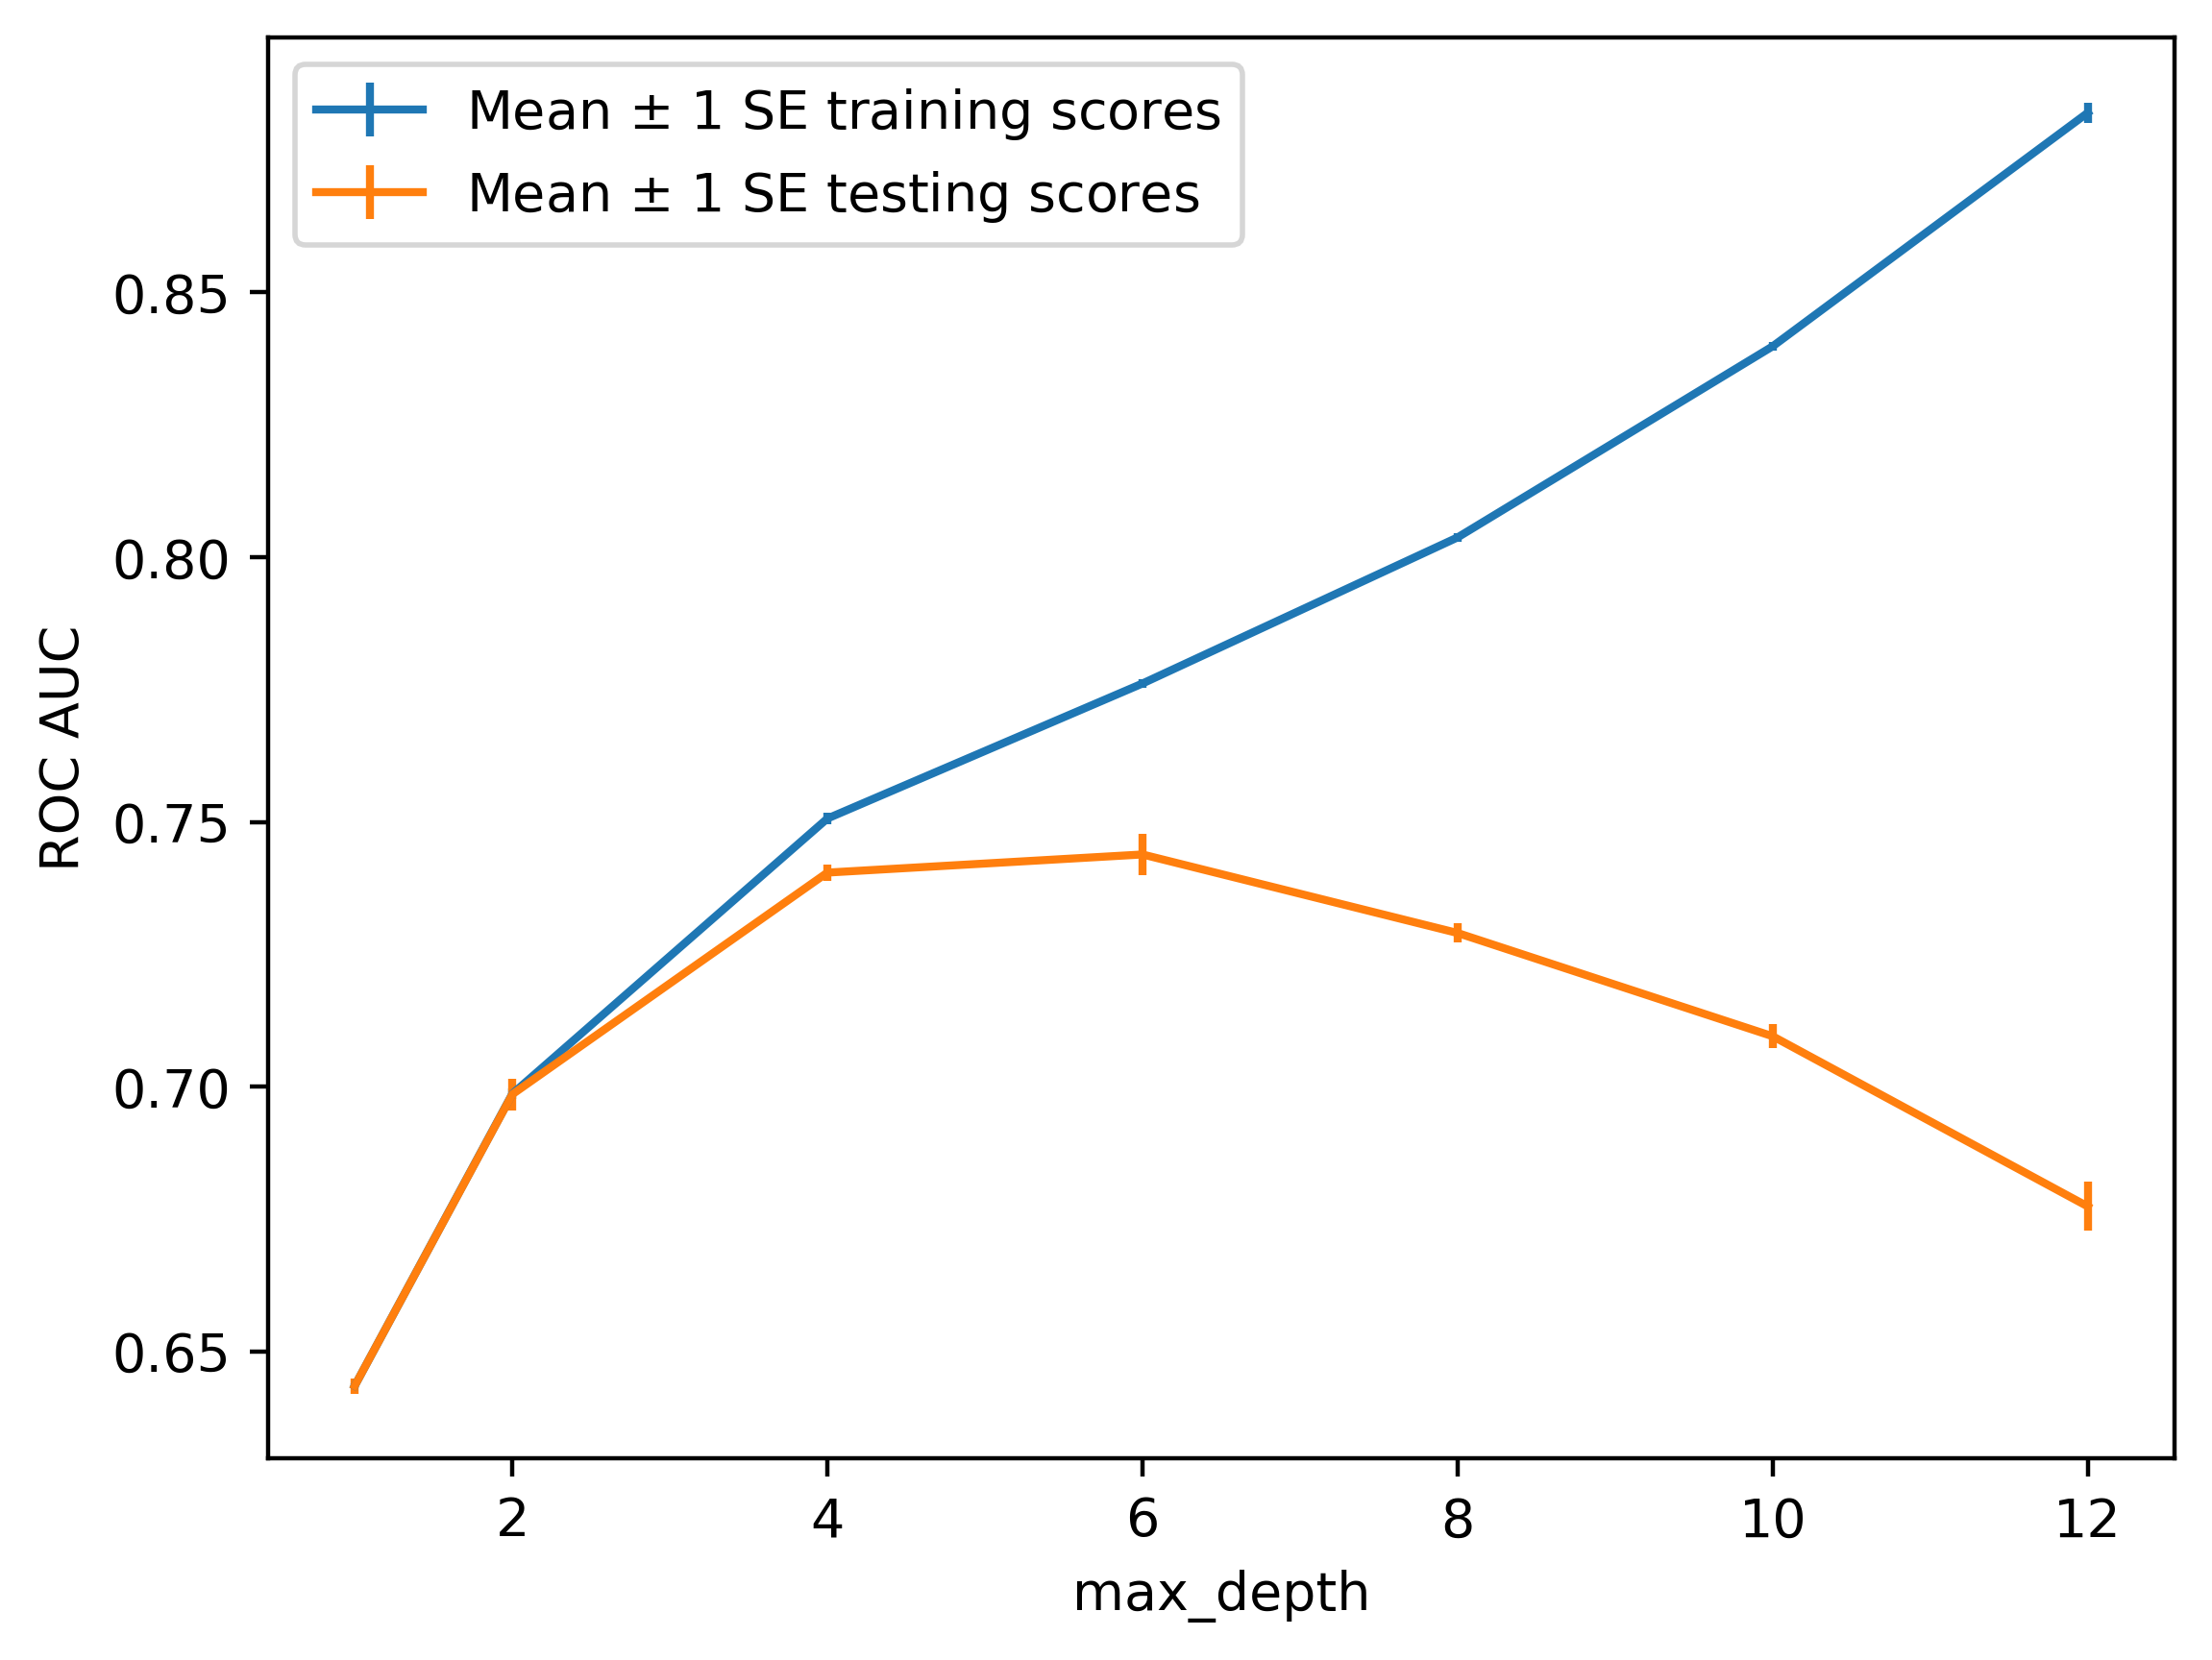

In [7]:
cv_results_df = pd.DataFrame(cv.cv_results_)
#View the names of the remaining columns in the results DataFrame
cv_results_df.columns
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_train_score'],
yerr=cv_results_df['std_train_score']/np.sqrt(4),
label=r'Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_test_score'],
yerr=cv_results_df['std_test_score']/np.sqrt(4),
label=r'Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.show()

Nhiệm vụ 3: Xây dựng rừng cây (random forest)
1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu
2. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

3. Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

In [9]:
#a parameter grid for this exercise in order to search the numbers of trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators':list(range(10,110,10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                        scoring='roc_auc', n_jobs=None,
                        refit=True, cv=4, verbose=1,
                        error_score=np.nan,
                        return_train_score=True)
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

4. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19020\342765841.py:12: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')


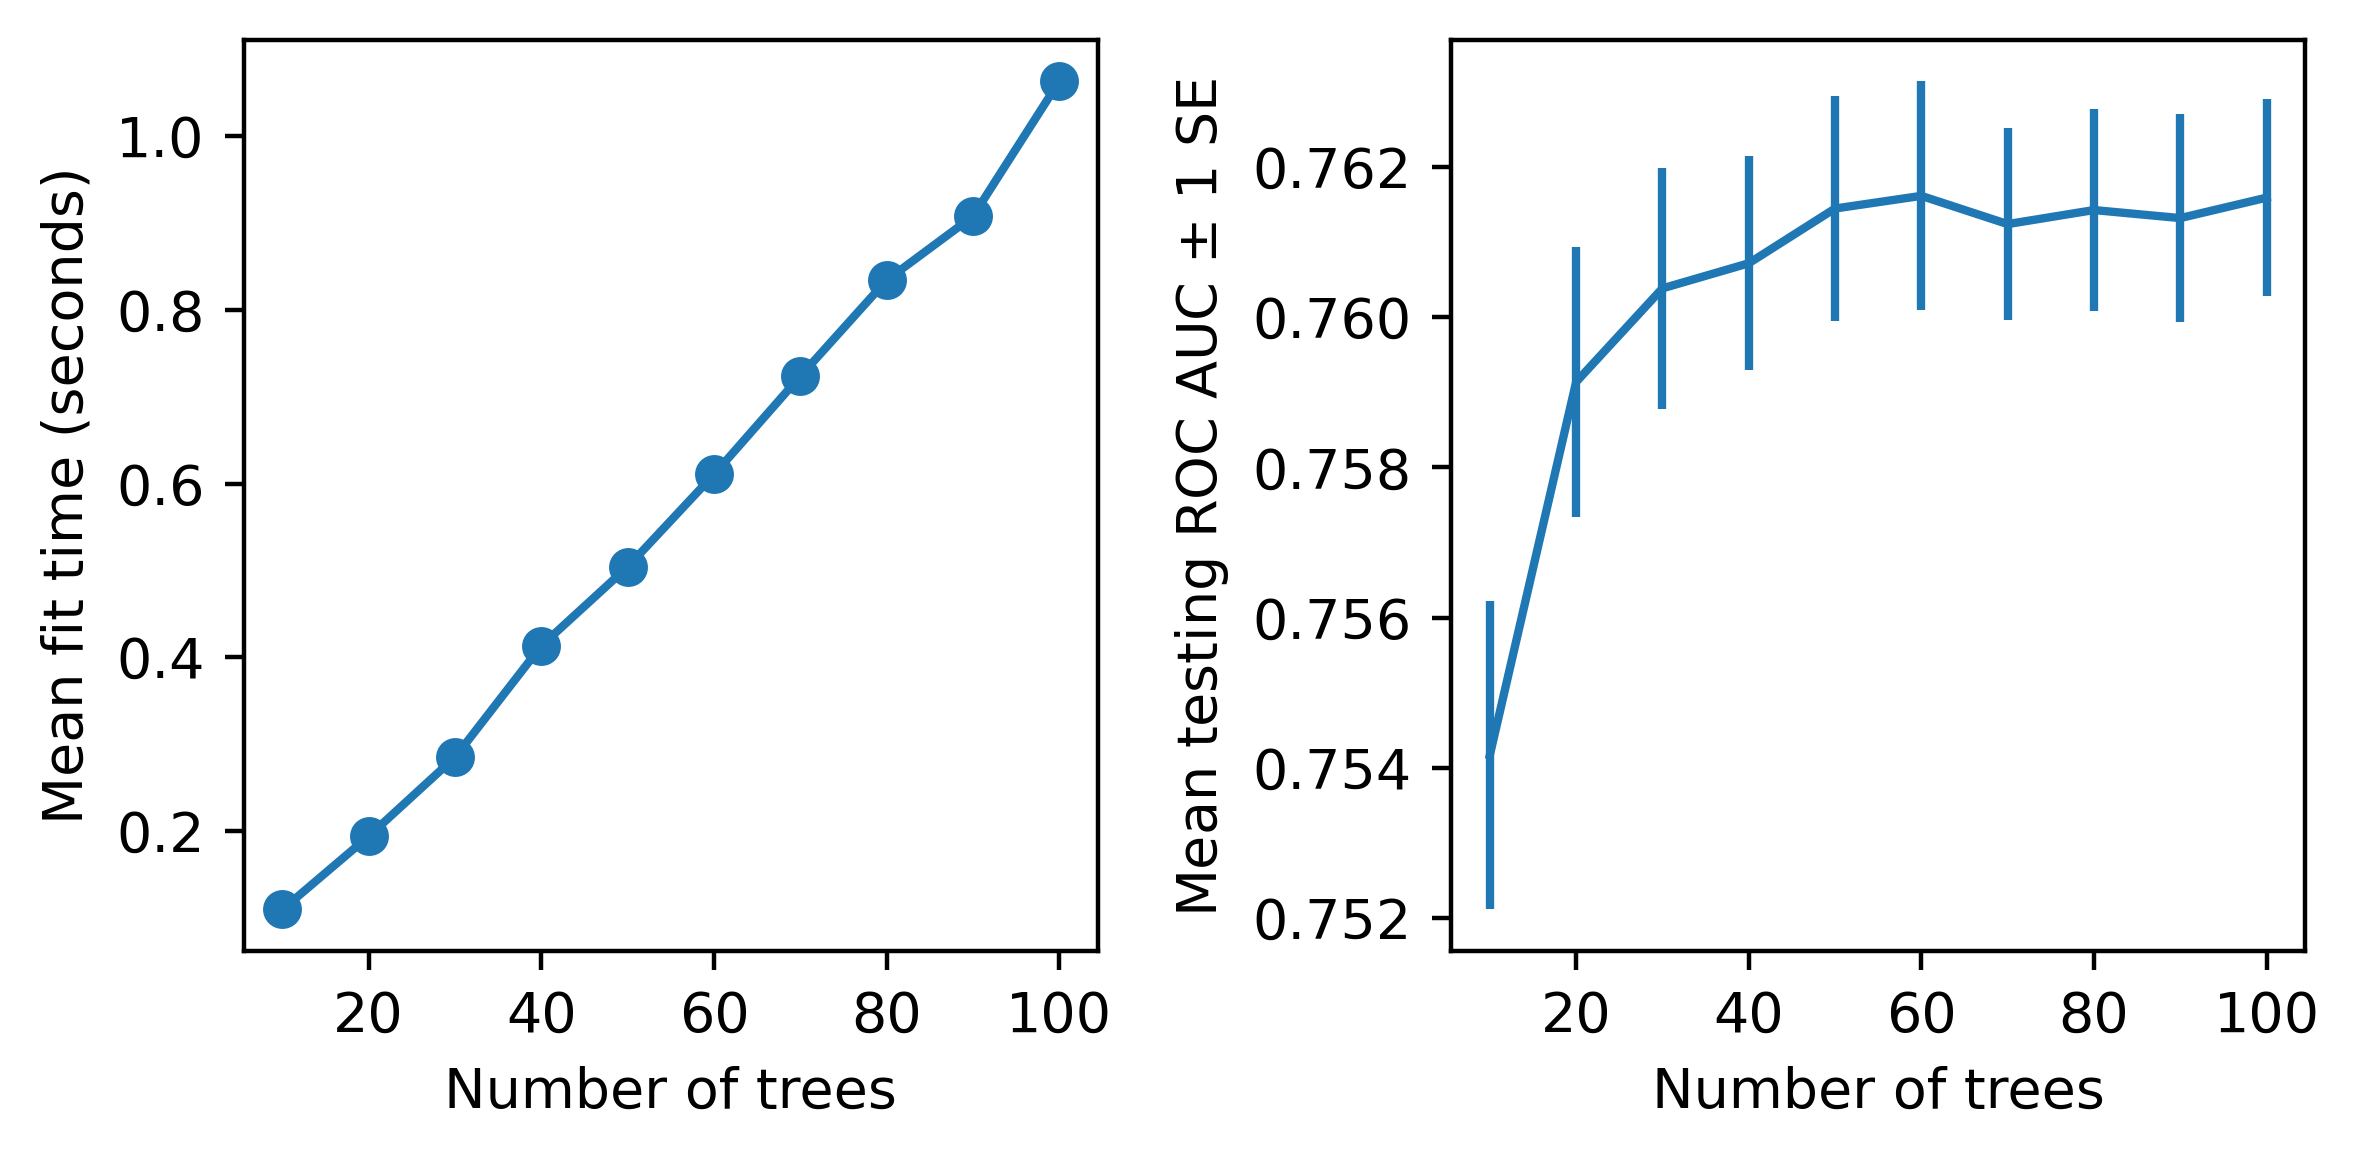

In [10]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_fit_time'],
    '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
    cv_rf_ex_results_df['mean_test_score'],
    yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()
plt.show()

5. Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham số tốt nhất

<Figure size 3200x2400 with 0 Axes>

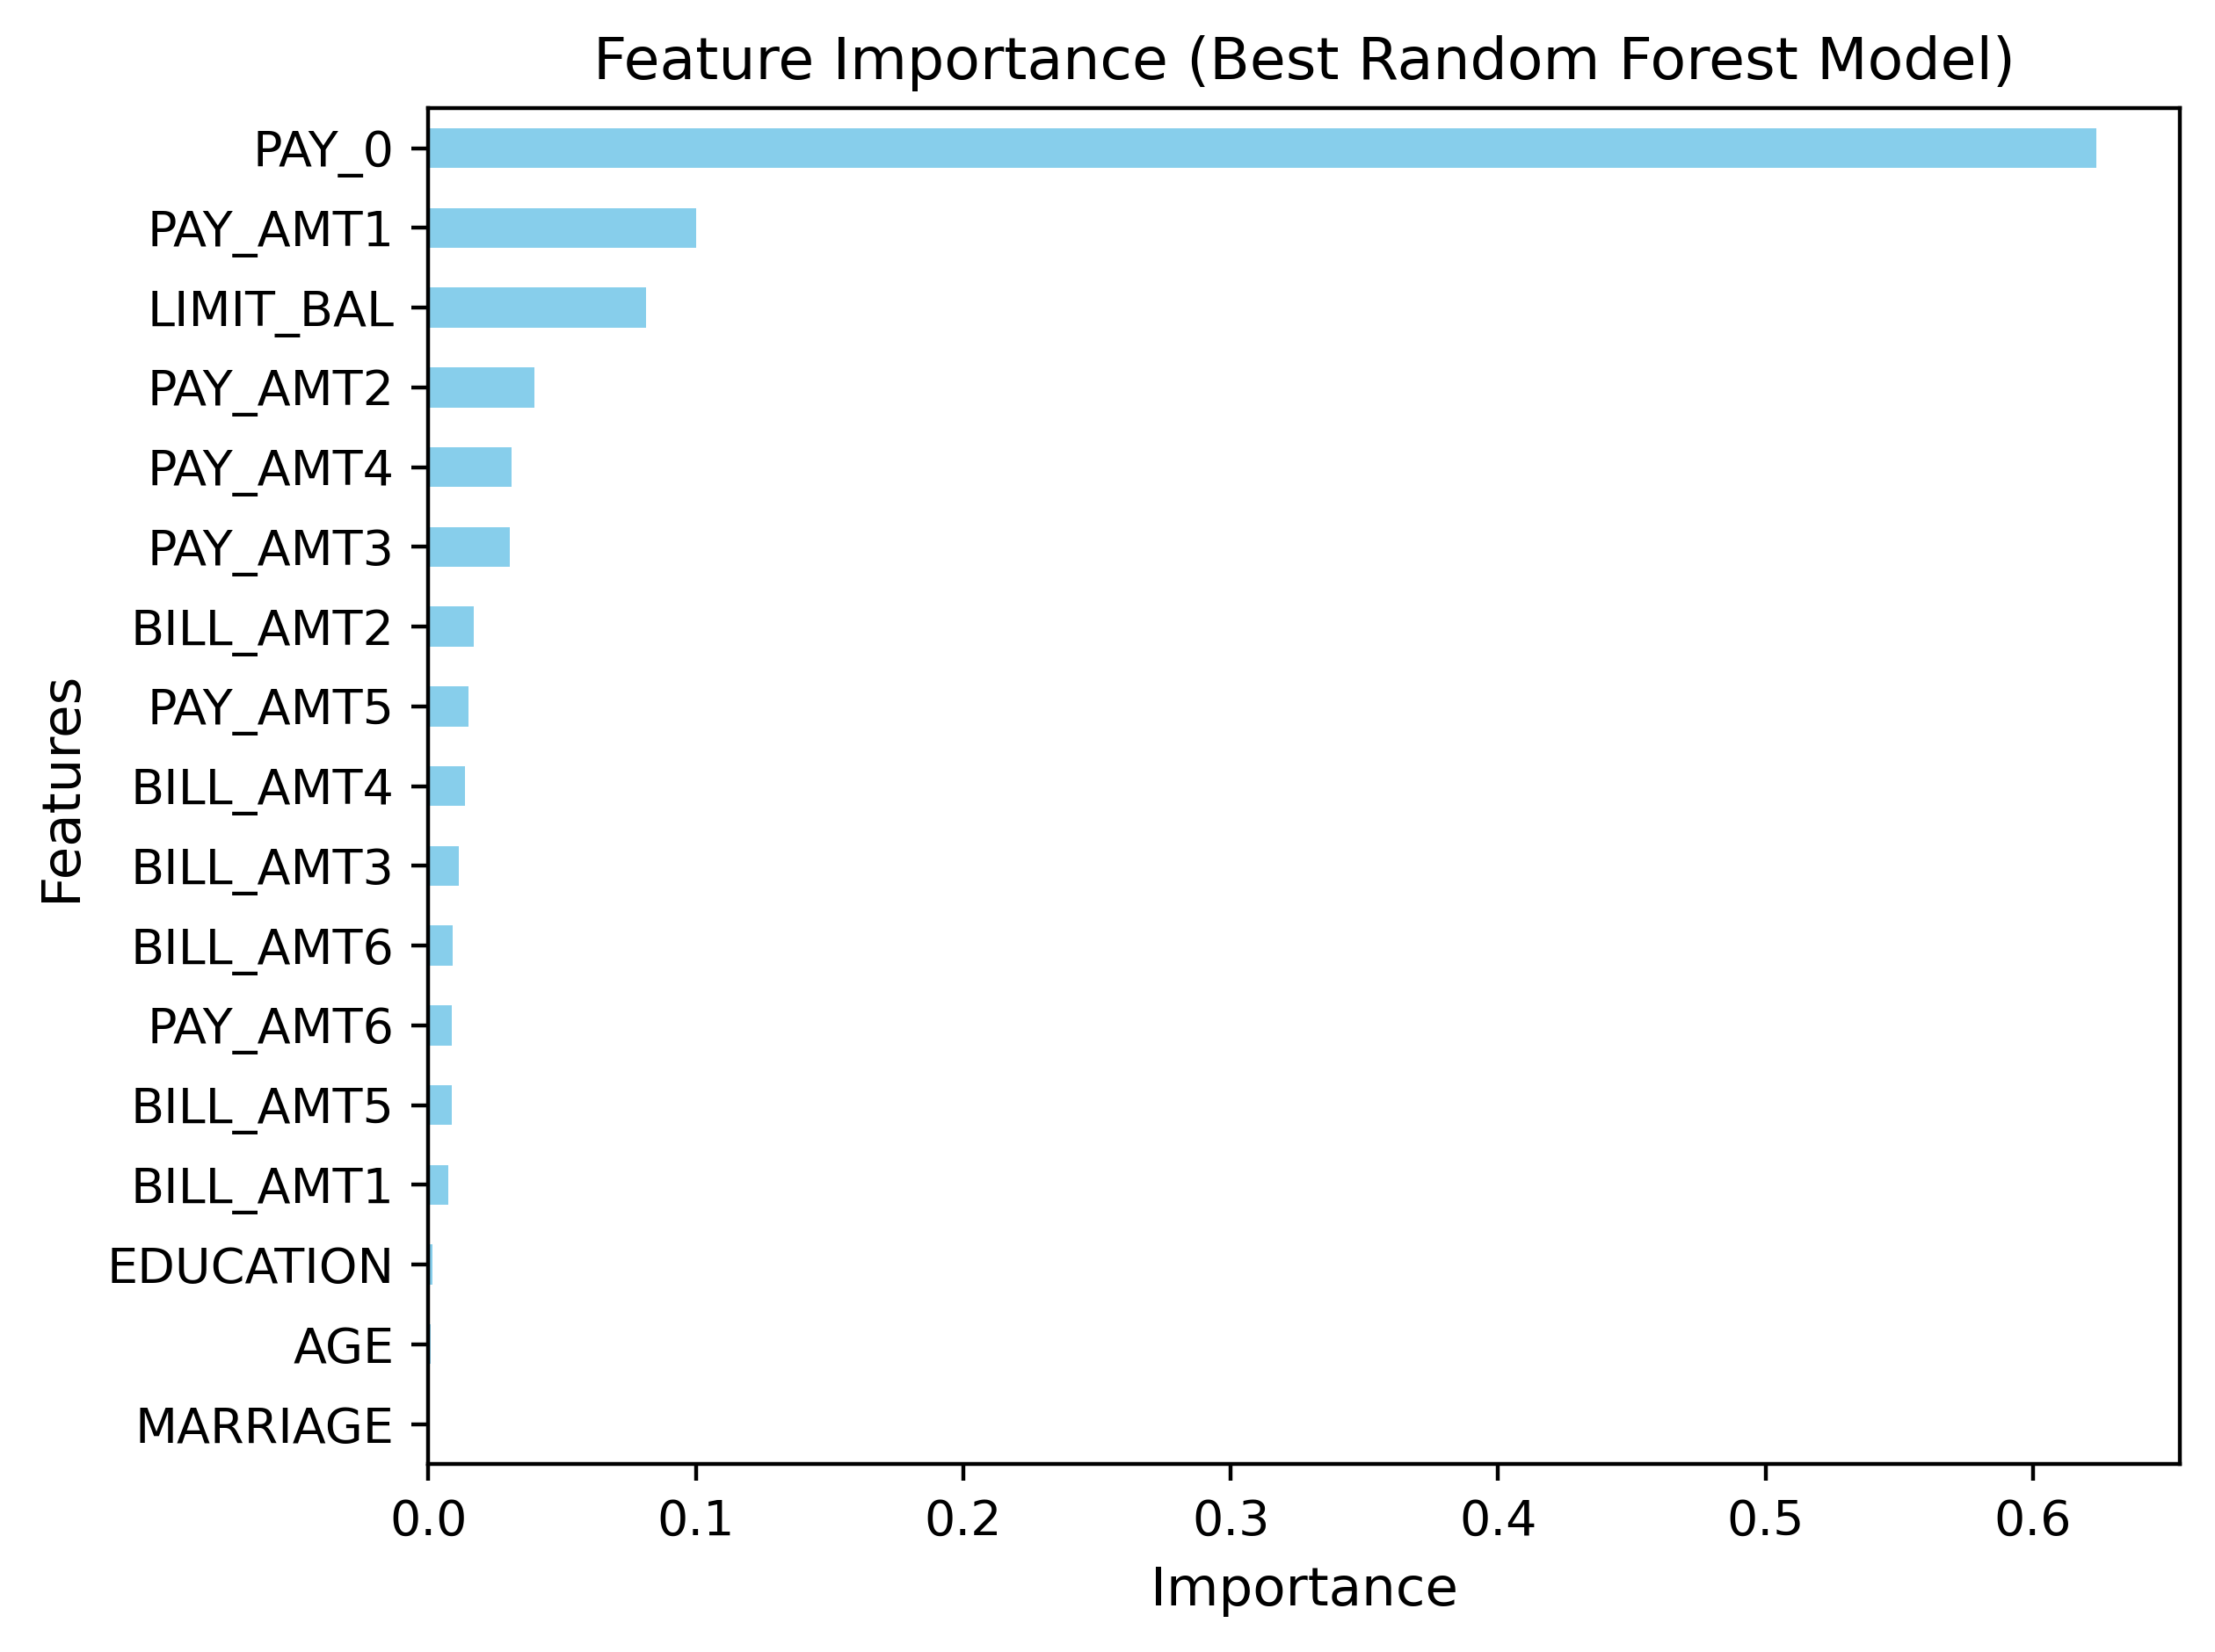

In [11]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# --- Feature importance ---
import matplotlib.pyplot as plt
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_
}, index=features_response[:-1])
# Vẽ biểu đồ thanh ngang sắp xếp tăng dần
plt.figure(figsize=(8,6))  # 👈 Đảm bảo chỉ 1 biểu đồ được tạo
feat_imp_df.sort_values('Importance', ascending=True).plot.barh(color='skyblue', legend=False)
plt.title('Feature Importance (Best Random Forest Model)', fontsize=12)
plt.xlabel('Importance', fontsize=11)
plt.ylabel('Features', fontsize=11)
plt.tight_layout()
plt.show()


## 2.1.3. Bài tập thực hành 1
Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ
https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

1) Import & nạp dữ liệu + tiền xử lý cơ bản

Ghi chú: Titanic có nhiều feature dạng categorical (Sex, Embarked). Ta sẽ xử lý missing, mã hoá, tạo một số biến bổ trợ (Ví dụ: Age nhóm, Title,...). Bạn có thể đơn giản hoá theo nhu cầu môn học.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import graphviz


2. Nạp dữ liệu, phân tích và loại bỏ features không cần thiết

In [13]:
df = pd.read_csv("data/train.csv")
print("Kích thước dữ liệu:", df.shape)
df.head()
# Loại bỏ các cột không liên quan đến mô hình
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Điền giá trị thiếu
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Mã hóa biến phân loại
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Tạo thêm feature mới: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df.info()


Kích thước dữ liệu: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


3. Chuẩn bị dữ liệu cho tập train và tập test

In [14]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24, stratify=y
)

print("Tập train:", X_train.shape, "| Tập test:", X_test.shape)

Tập train: (712, 8) | Tập test: (179, 8)


4. Xây dựng cây quyết định (DecisionTreeClassifier)

In [15]:
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=24)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

5. Hiển thị cây quyết định bằng graphviz

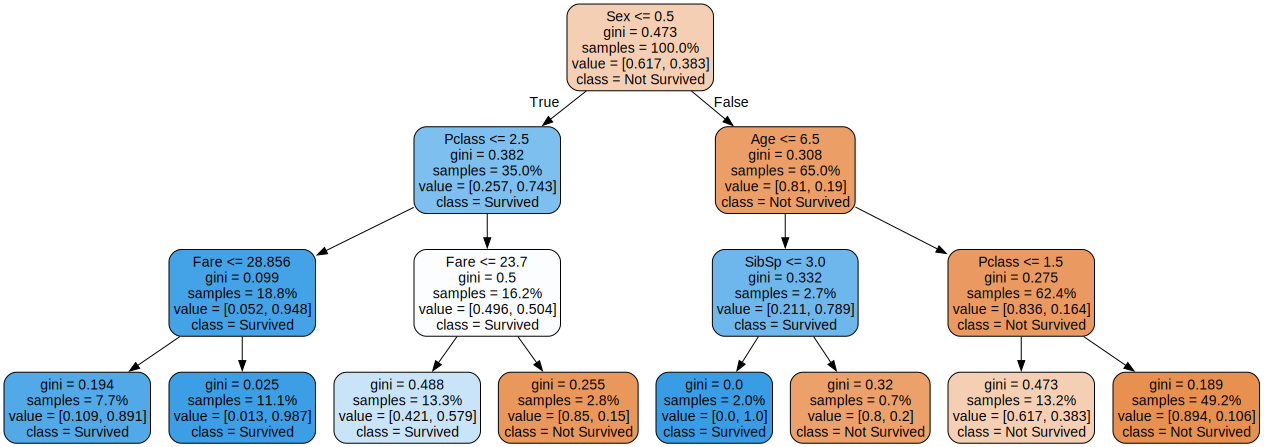

In [16]:
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    proportion=True,
    class_names=['Not Survived', 'Survived']
)
graph = graphviz.Source(dot_data)
graph


6. Tạo cây quyết định và xác định các giá trị tham số để tìm tham số tối ưu

In [17]:
params = {'max_depth': [2, 3, 4, 6, 8, 10]}
dt_cv = tree.DecisionTreeClassifier(random_state=24)

cv = GridSearchCV(
    estimator=dt_cv,
    param_grid=params,
    scoring='roc_auc',
    refit=True,
    cv=4,
    return_train_score=True,
    verbose=1
)

cv.fit(X_train, y_train)

print("Tham số tối ưu:", cv.best_params_)
print("AUC trung bình (tốt nhất):", cv.best_score_)


Fitting 4 folds for each of 6 candidates, totalling 24 fits
Tham số tối ưu: {'max_depth': 3}
AUC trung bình (tốt nhất): 0.8557620591932606


7. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu khác nhau

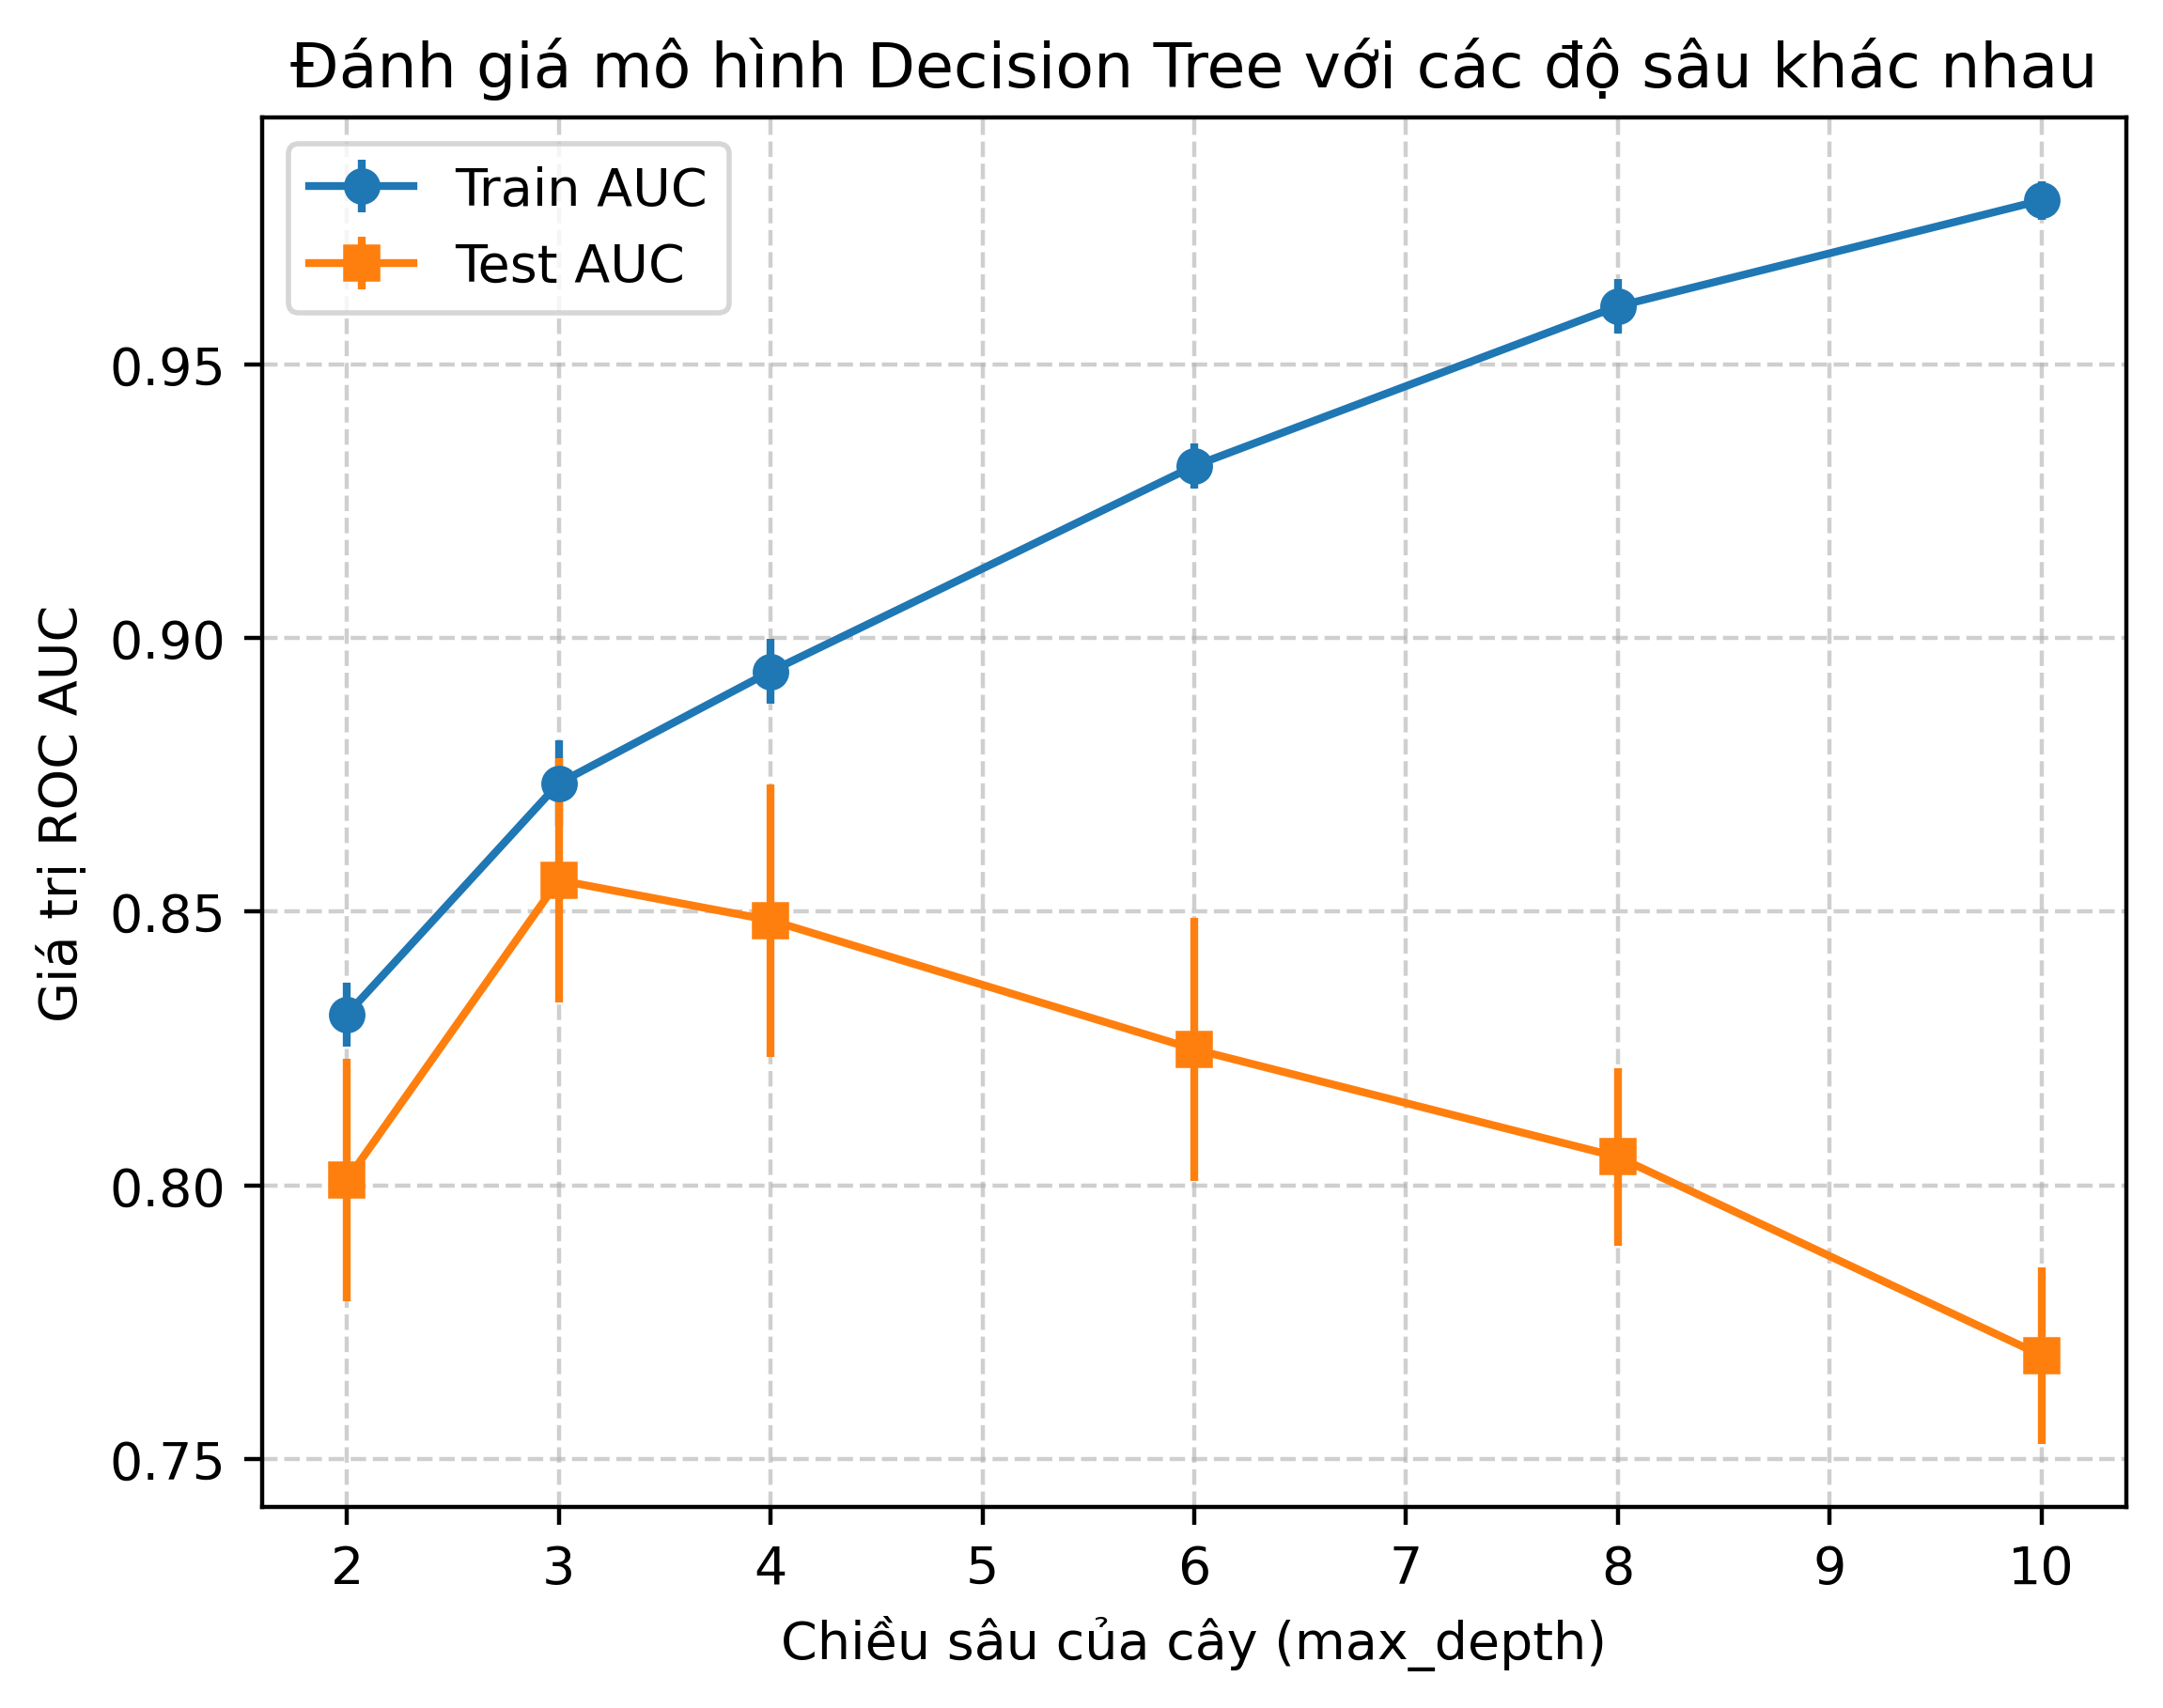

In [18]:
cv_results_df = pd.DataFrame(cv.cv_results_)

ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
             cv_results_df['mean_train_score'],
             yerr=cv_results_df['std_train_score']/np.sqrt(4),
             label='Train AUC', marker='o')

ax.errorbar(cv_results_df['param_max_depth'],
             cv_results_df['mean_test_score'],
             yerr=cv_results_df['std_test_score']/np.sqrt(4),
             label='Test AUC', marker='s')

plt.xlabel('Chiều sâu của cây (max_depth)')
plt.ylabel('Giá trị ROC AUC')
plt.title('Đánh giá mô hình Decision Tree với các độ sâu khác nhau')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


8. Tạo rừng cây với lớp RandomForestClassifier

In [19]:
rf = RandomForestClassifier(
    n_estimators=50, criterion='gini', max_depth=4, random_state=24
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=24)

9. Tìm tham số tối ưu cho mô hình rừng cây

In [20]:
rf_params = {'n_estimators': list(range(10, 110, 10))}

cv_rf = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring='roc_auc',
    refit=True,
    cv=4,
    return_train_score=True,
    verbose=1
)

cv_rf.fit(X_train, y_train)

print("Tham số tốt nhất:", cv_rf.best_params_)
print("AUC trung bình (tốt nhất):", cv_rf.best_score_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
Tham số tốt nhất: {'n_estimators': 100}
AUC trung bình (tốt nhất): 0.8621371056762988


10. Vẽ biểu đồ đánh giá mô hình rừng cây với các số lượng cây khác nhau

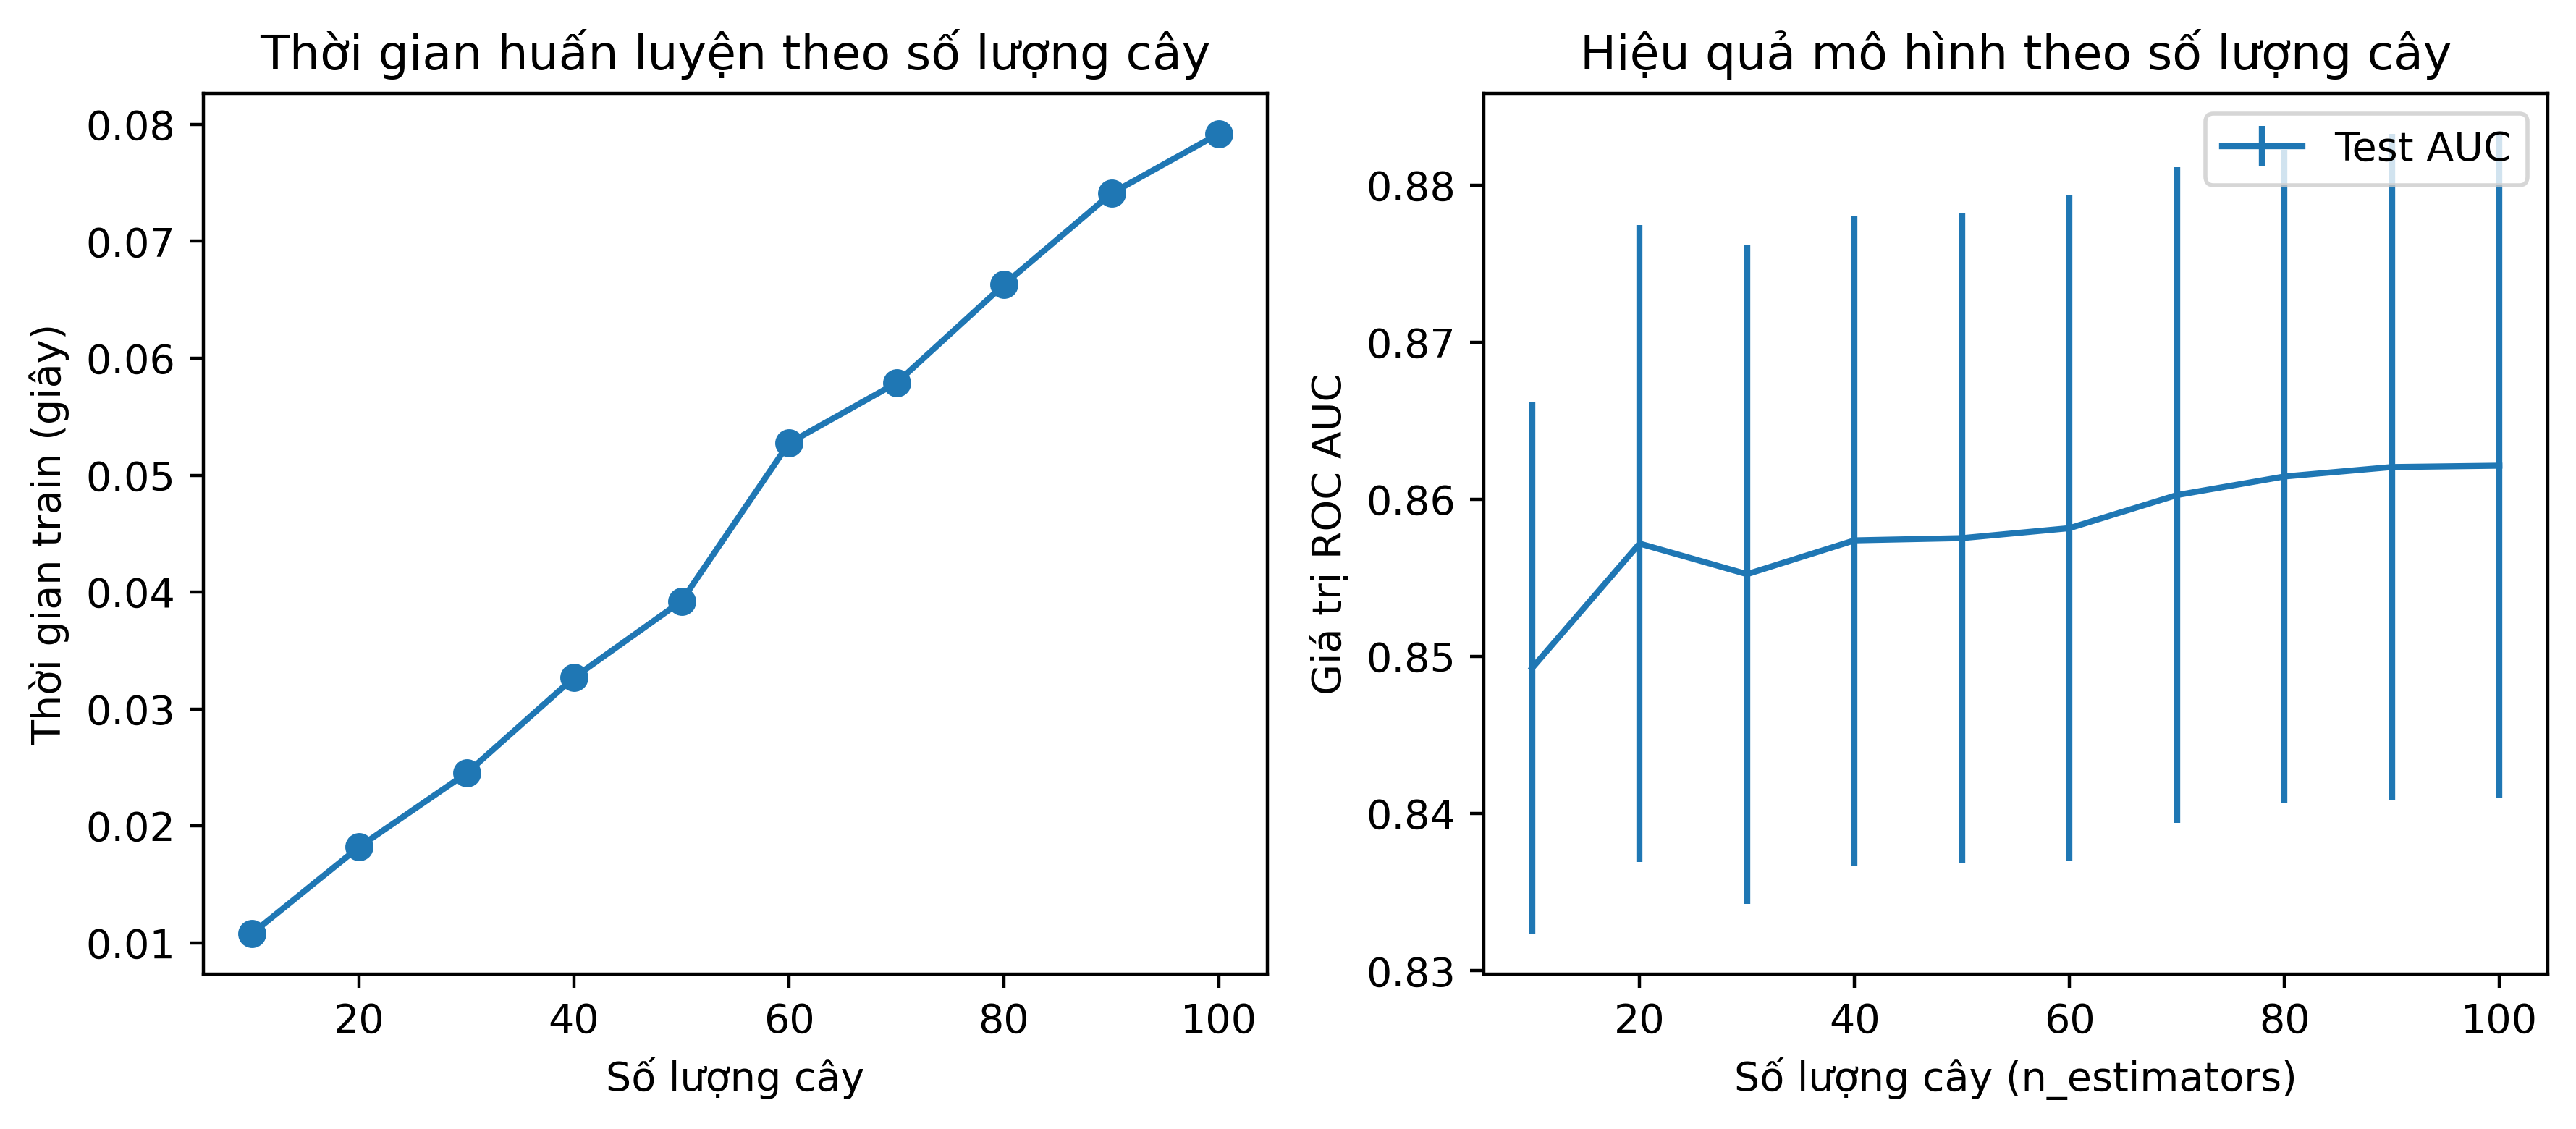

In [21]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].plot(cv_rf_results_df['param_n_estimators'],
             cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Số lượng cây')
axs[0].set_ylabel('Thời gian train (giây)')
axs[0].set_title('Thời gian huấn luyện theo số lượng cây')

axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score']/np.sqrt(4),
                label='Test AUC')
axs[1].set_xlabel('Số lượng cây (n_estimators)')
axs[1].set_ylabel('Giá trị ROC AUC')
axs[1].set_title('Hiệu quả mô hình theo số lượng cây')
axs[1].legend()
plt.tight_layout()
plt.show()


11. Xem tham số tốt nhất và mức độ quan trọng của từng feature

Tham số tốt nhất của Random Forest: {'n_estimators': 100}


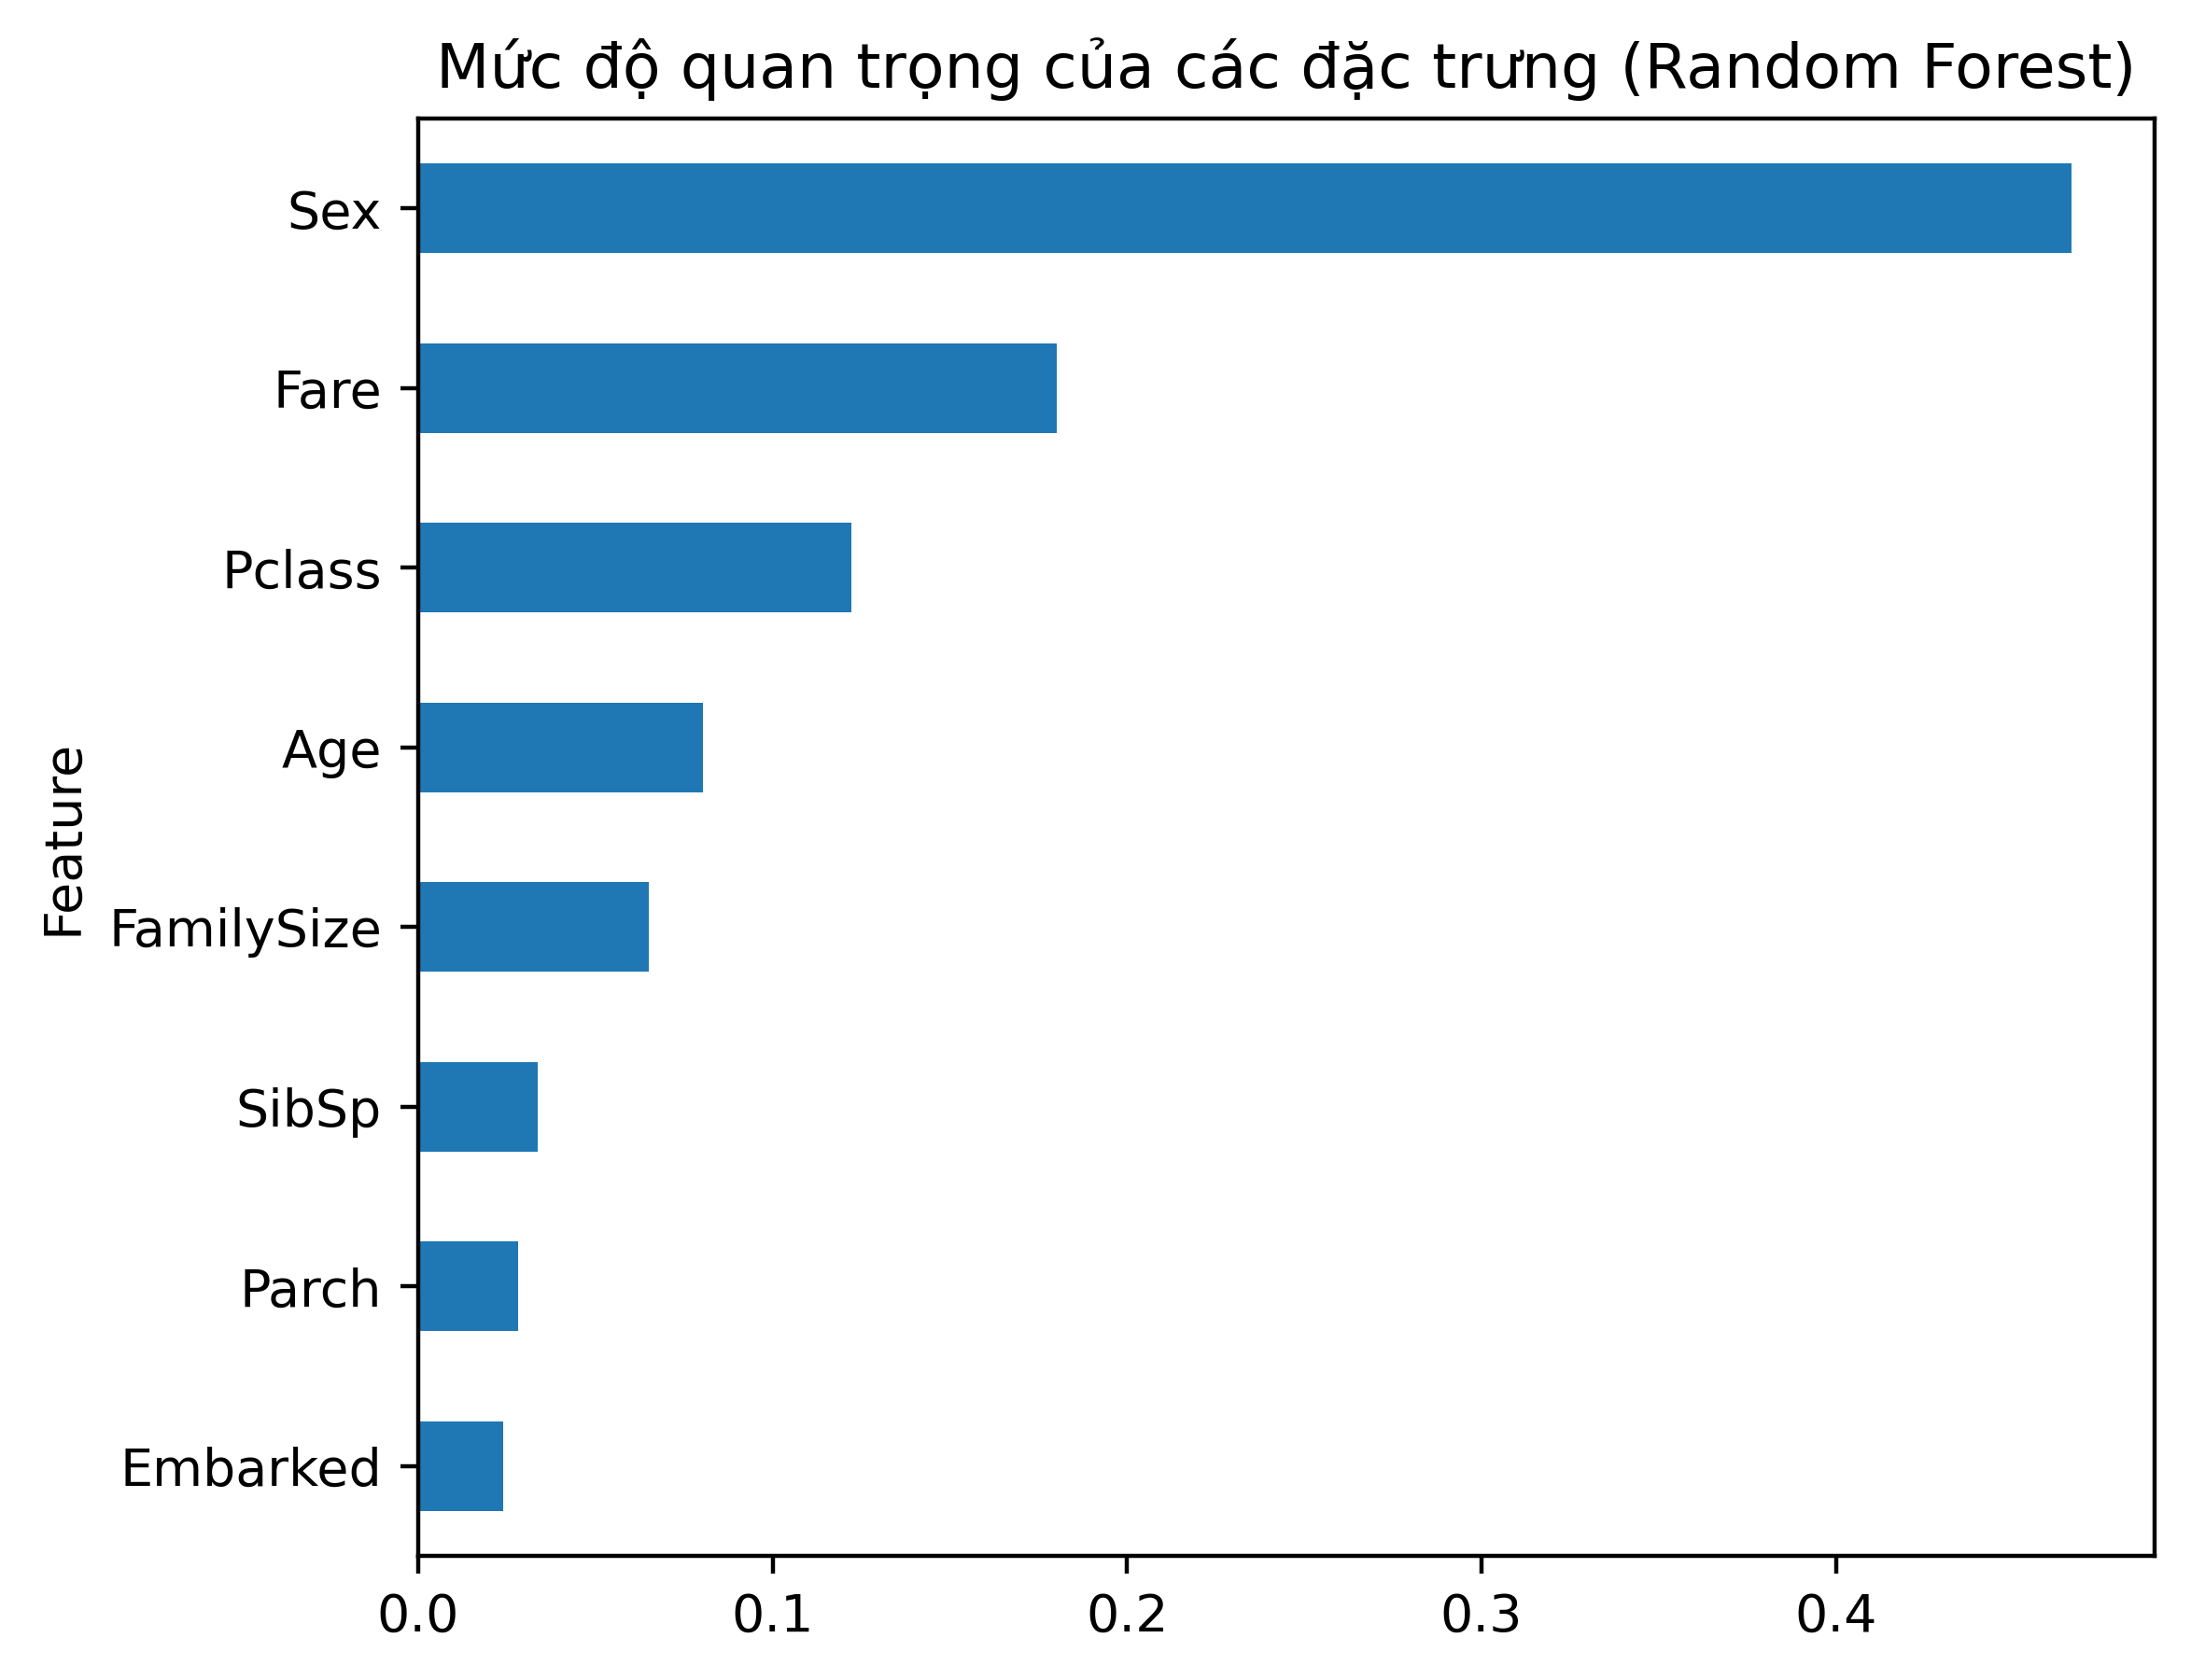

In [22]:
print("Tham số tốt nhất của Random Forest:", cv_rf.best_params_)

feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cv_rf.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=True)

feat_imp_df.plot.barh(x='Feature', y='Importance', figsize=(6,5), legend=False)
plt.title('Mức độ quan trọng của các đặc trưng (Random Forest)')
plt.show()


## 2.1.4. Bài tập thực hành 2

1. Tải các package cần thiết và package graphviz để vẽ cây quyết định

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import graphviz

2. Nạp dữ liệu và loại bỏ các features không liên quan

In [24]:
df = pd.read_csv("data/diabetes_prediction_dataset.csv")
print("Kích thước dữ liệu:", df.shape)
df.head()

# Xem danh sách các cột trong file của bạn
print("Tên các cột dữ liệu:")
print(df.columns.tolist())
# Chuyển đổi giới tính sang số
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})

# Mã hóa cột smoking_history (nhiều giá trị phân loại)
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

# Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu mỗi cột:")
print(df.isnull().sum())

Kích thước dữ liệu: (100000, 9)
Tên các cột dữ liệu:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
Số lượng giá trị thiếu mỗi cột:
gender                         0
age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64


3. Chuẩn bị dữ liệu cho tập train và test

In [25]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24, stratify=y
)

print("Tập train:", X_train.shape, "| Tập test:", X_test.shape)


Tập train: (80000, 12) | Tập test: (20000, 12)


4. Xây dựng cây quyết định (DecisionTreeClassifier)

In [26]:
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=24)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

5. Hiển thị cây quyết định bằng graphviz

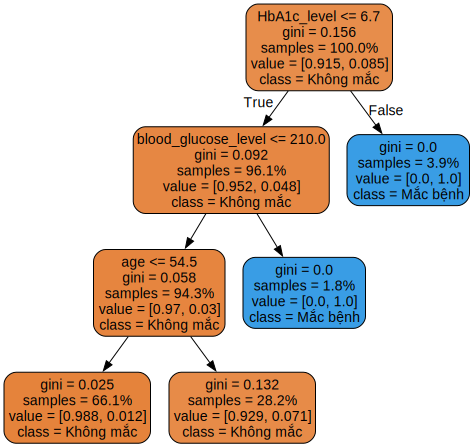

In [27]:
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    proportion=True,
    class_names=['Không mắc', 'Mắc bệnh']
)
graph = graphviz.Source(dot_data)
graph

6. Tạo cây và xác định tham số tối ưu

In [28]:
params = {'max_depth': [2, 3, 4, 6, 8, 10]}
dt_cv = tree.DecisionTreeClassifier(random_state=24)

cv = GridSearchCV(
    estimator=dt_cv,
    param_grid=params,
    scoring='roc_auc',
    refit=True,
    cv=4,
    return_train_score=True,
    verbose=1
)

cv.fit(X_train, y_train)
print("Tham số tối ưu:", cv.best_params_)
print("AUC trung bình (tốt nhất):", cv.best_score_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Tham số tối ưu: {'max_depth': 10}
AUC trung bình (tốt nhất): 0.9739976012536162


7. Vẽ biểu đồ đánh giá mô hình với các chiều sâu khác nhau

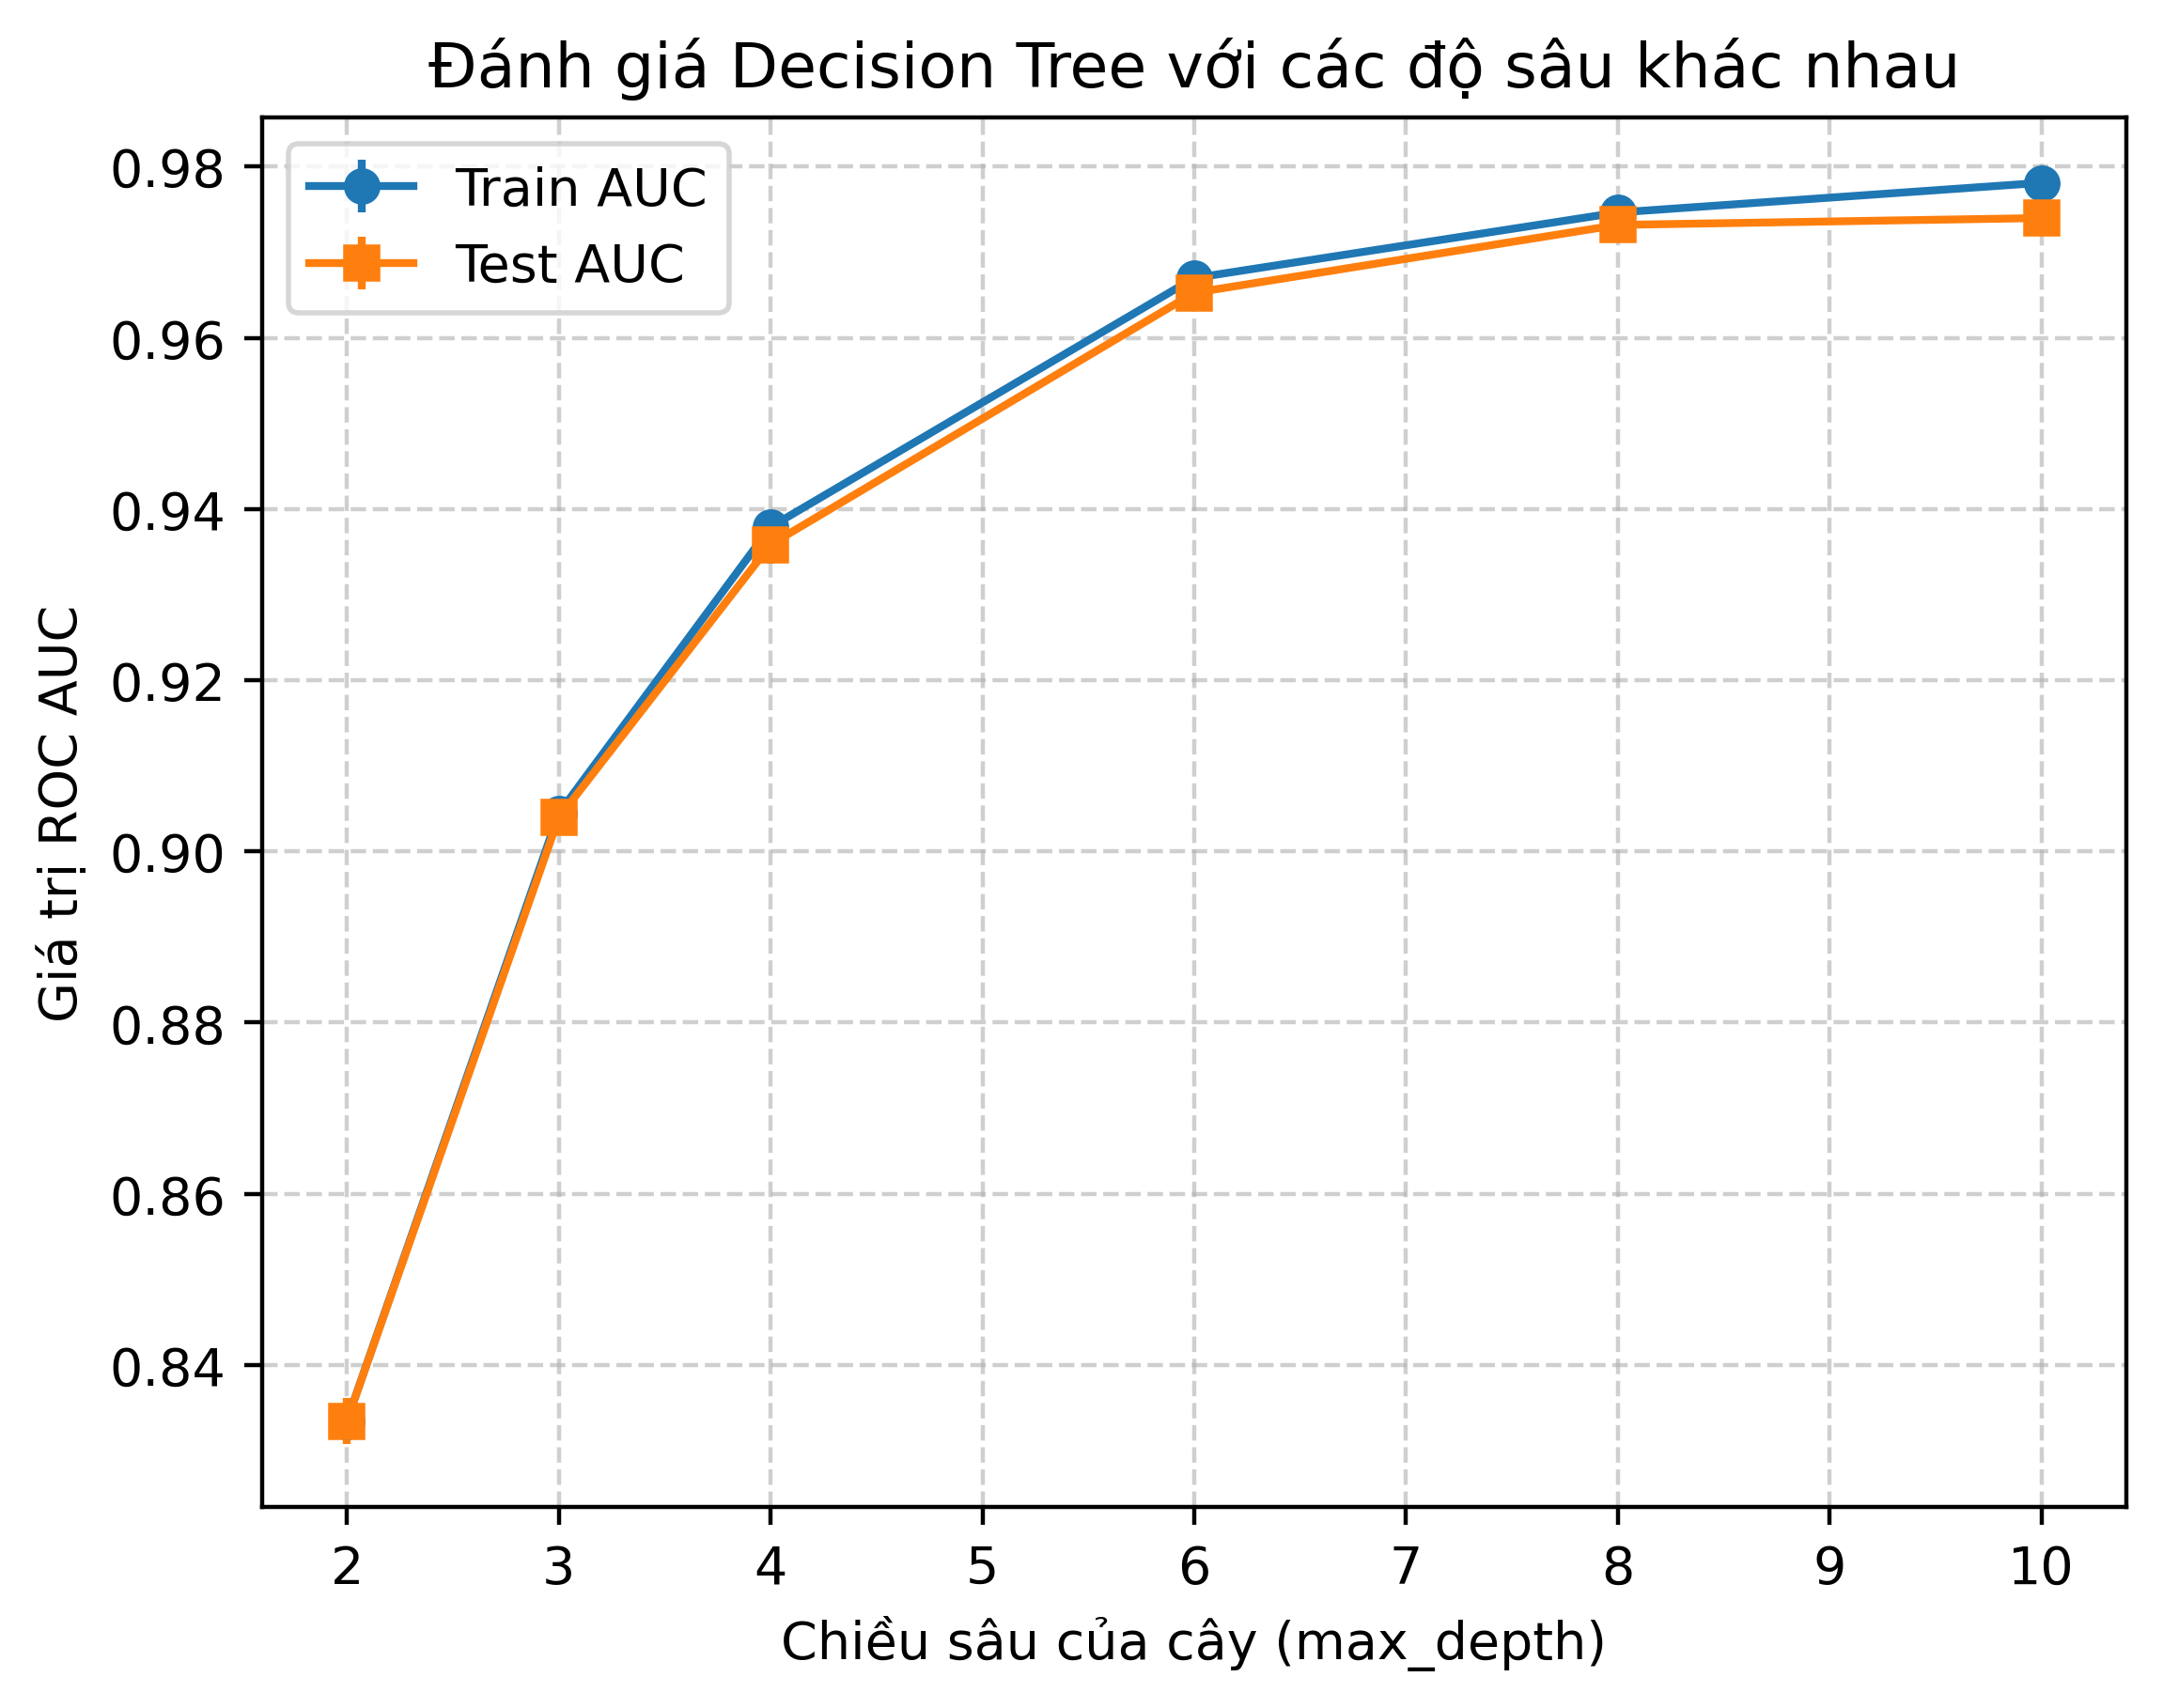

In [29]:
cv_results_df = pd.DataFrame(cv.cv_results_)

ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
             cv_results_df['mean_train_score'],
             yerr=cv_results_df['std_train_score']/np.sqrt(4),
             label='Train AUC', marker='o')

ax.errorbar(cv_results_df['param_max_depth'],
             cv_results_df['mean_test_score'],
             yerr=cv_results_df['std_test_score']/np.sqrt(4),
             label='Test AUC', marker='s')

plt.xlabel('Chiều sâu của cây (max_depth)')
plt.ylabel('Giá trị ROC AUC')
plt.title('Đánh giá Decision Tree với các độ sâu khác nhau')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

8. Tạo mô hình Rừng cây (RandomForestClassifier)

In [30]:
rf = RandomForestClassifier(
    n_estimators=50, criterion='gini', max_depth=4, random_state=24
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=24)

9. Tìm tham số tối ưu cho mô hình rừng cây

In [31]:
rf_params = {'n_estimators': list(range(10, 110, 10))}

cv_rf = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring='roc_auc',
    refit=True,
    cv=4,
    return_train_score=True,
    verbose=1
)

cv_rf.fit(X_train, y_train)

print("Tham số tốt nhất:", cv_rf.best_params_)
print("AUC trung bình (tốt nhất):", cv_rf.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Tham số tốt nhất: {'n_estimators': 80}
AUC trung bình (tốt nhất): 0.9531474967855995


10. Vẽ biểu đồ đánh giá mô hình rừng cây

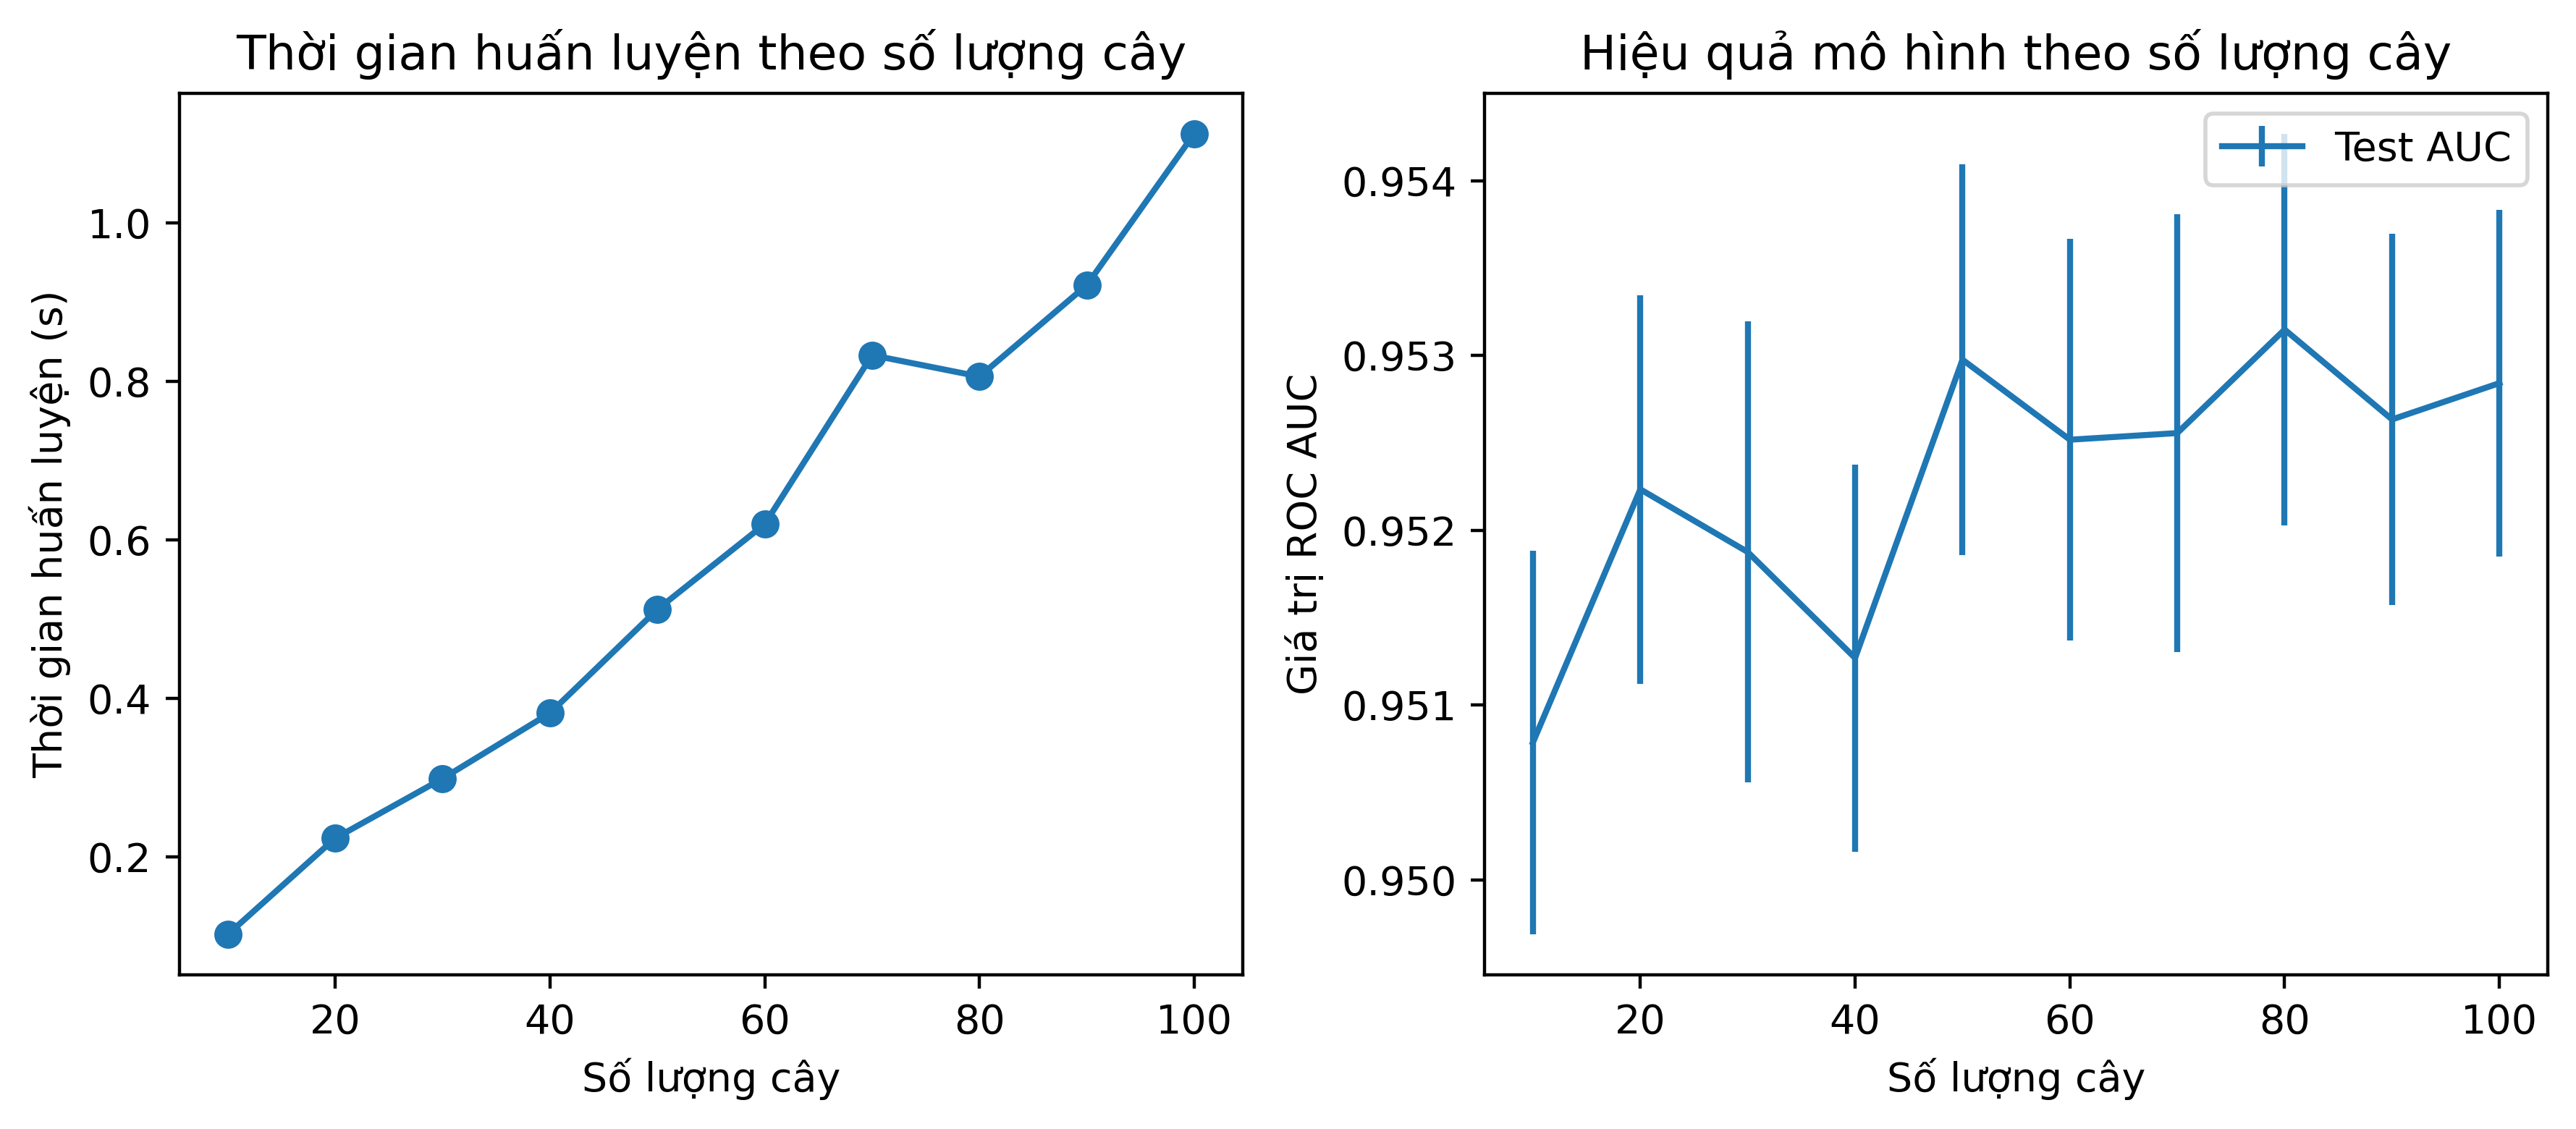

In [32]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].plot(cv_rf_results_df['param_n_estimators'],
             cv_rf_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Số lượng cây')
axs[0].set_ylabel('Thời gian huấn luyện (s)')
axs[0].set_title('Thời gian huấn luyện theo số lượng cây')

axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score']/np.sqrt(4),
                label='Test AUC')
axs[1].set_xlabel('Số lượng cây')
axs[1].set_ylabel('Giá trị ROC AUC')
axs[1].set_title('Hiệu quả mô hình theo số lượng cây')
axs[1].legend()
plt.tight_layout()
plt.show()

11. Xem tham số tốt nhất và mức độ quan trọng của các feature

Tham số tốt nhất của Random Forest: {'n_estimators': 80}


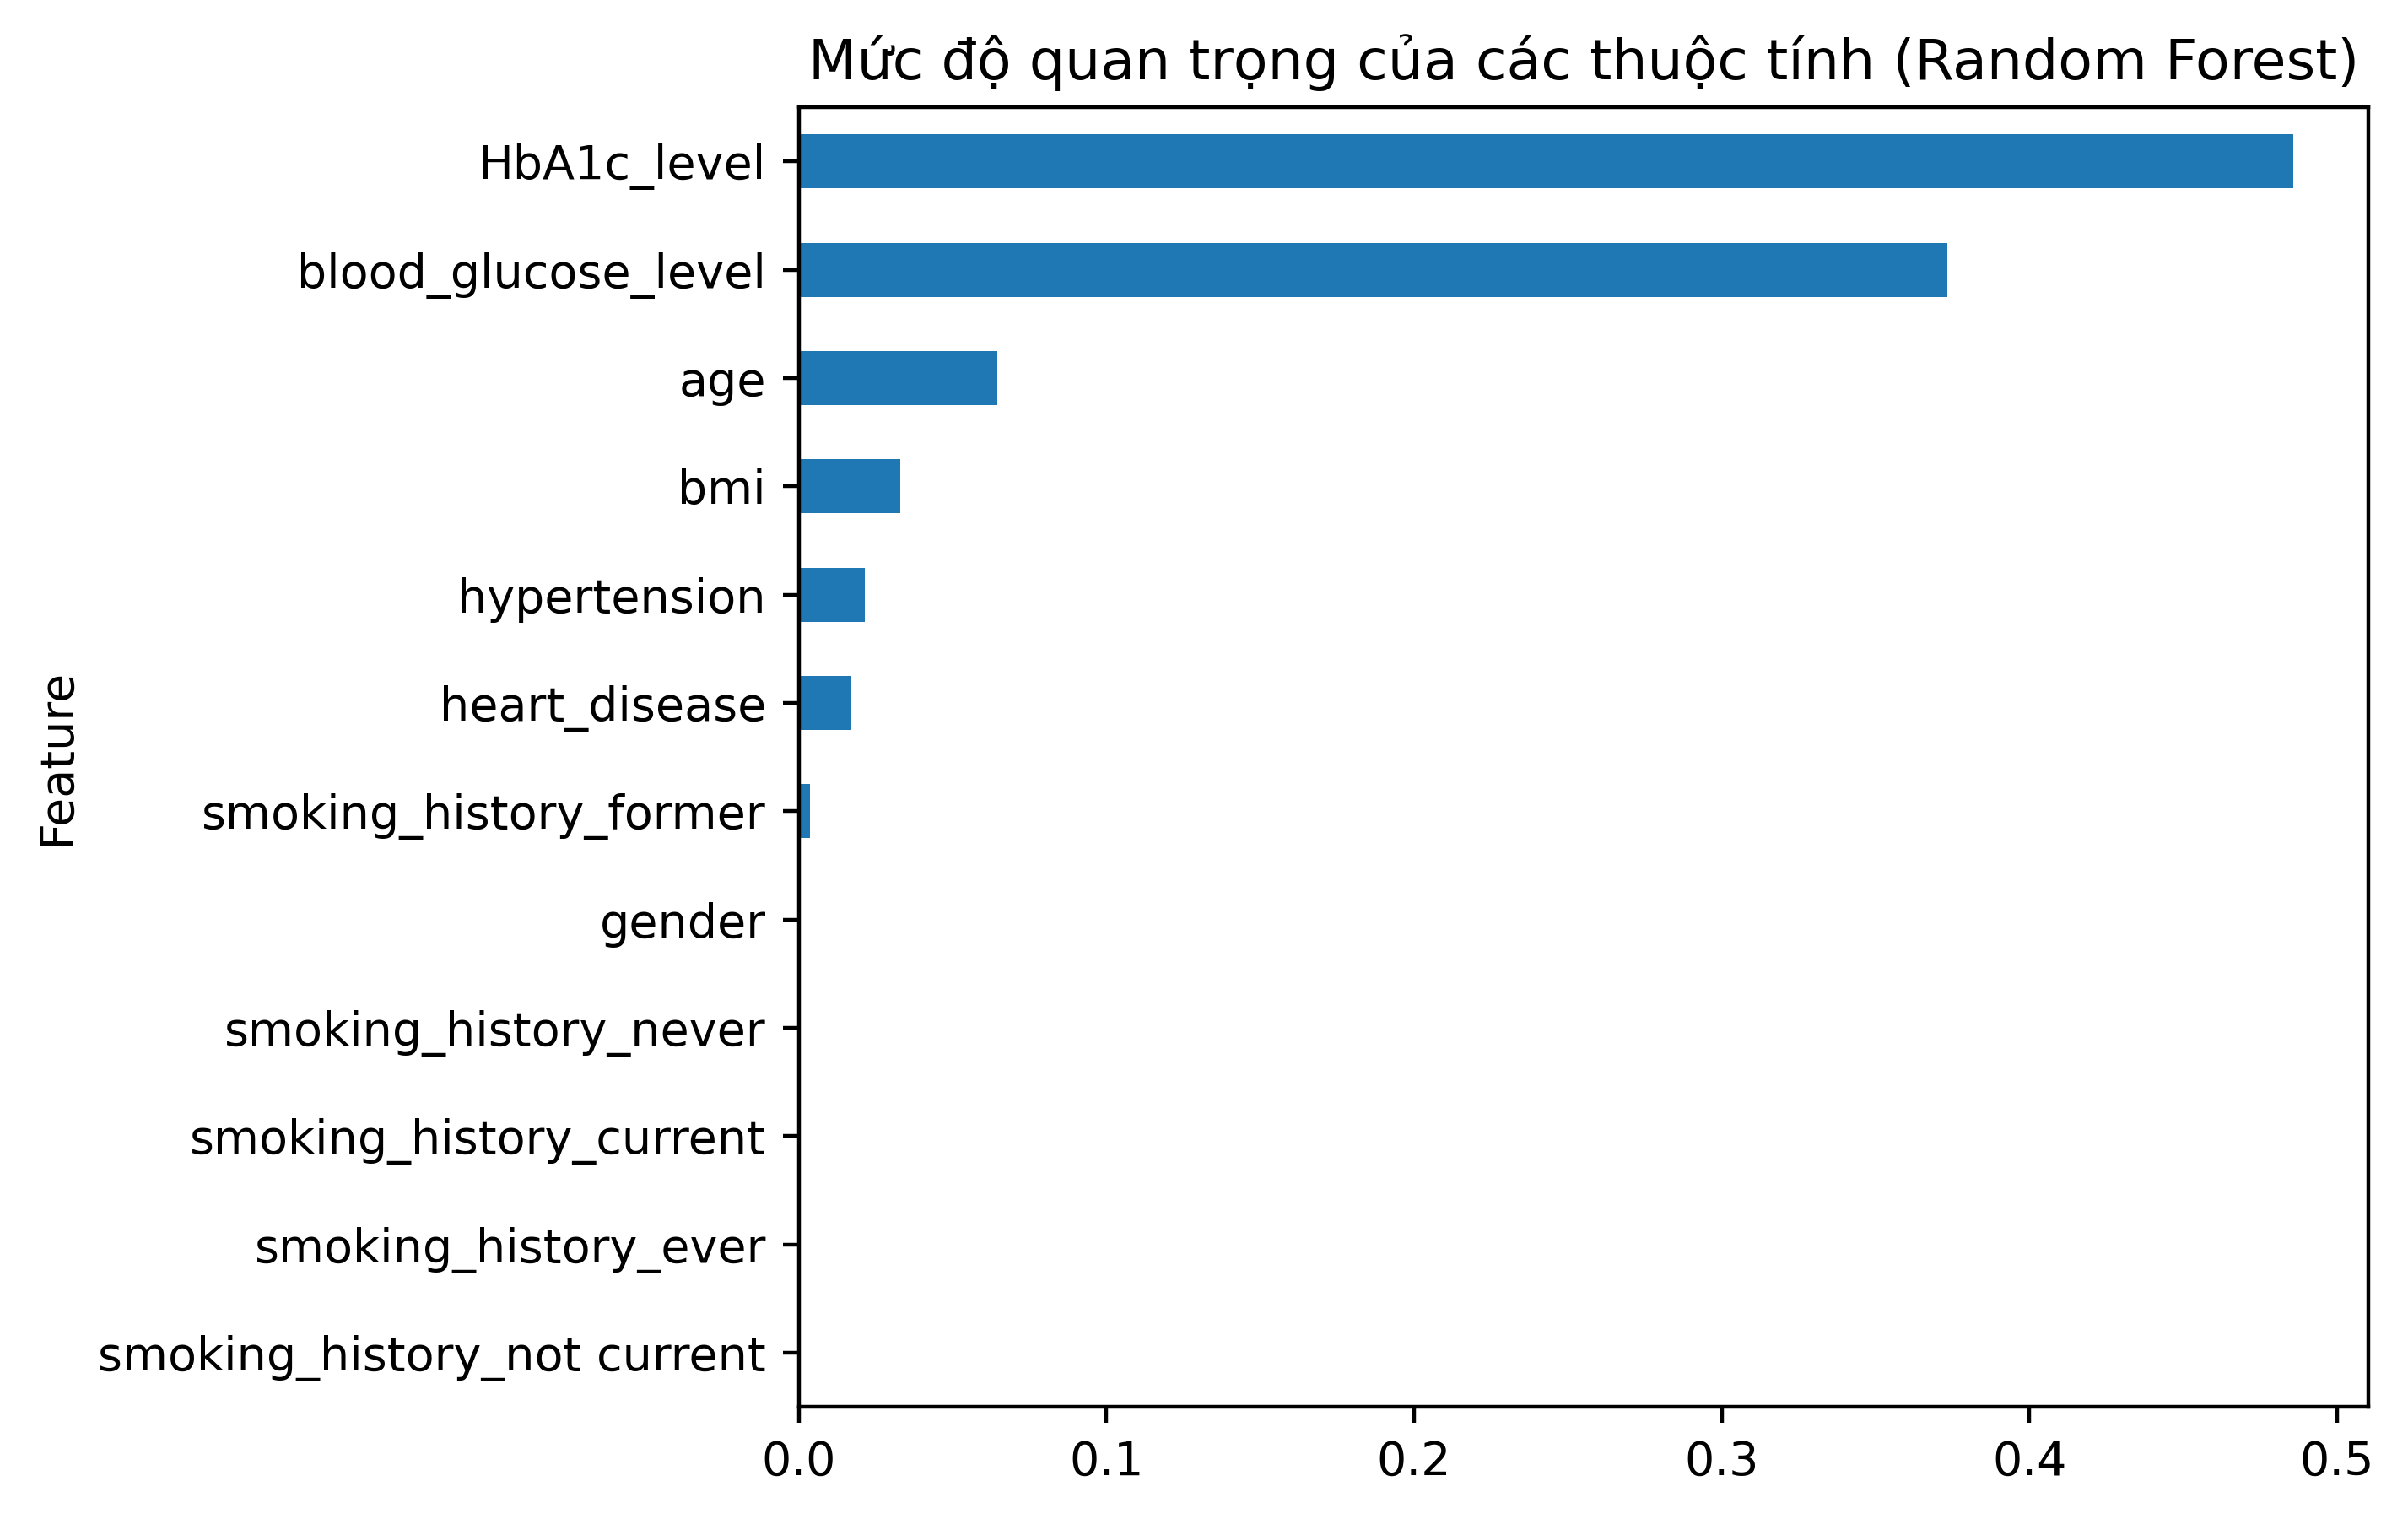

In [33]:
print("Tham số tốt nhất của Random Forest:", cv_rf.best_params_)

feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cv_rf.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=True)

feat_imp_df.plot.barh(x='Feature', y='Importance', figsize=(6,5), legend=False)
plt.title('Mức độ quan trọng của các thuộc tính (Random Forest)')
plt.show()